In [92]:
import geopandas as gpd
import rasterio
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import Point
from PIL import Image

tif = rasterio.open("./test_folder/images/NW00603.tif")
bbox = tif.bounds
print(bbox)

# # Reads the geojson only within the bounding box of the tif
mask = gpd.read_file("./test_folder/geojson/PV_MUC_20220506_1_Florian.geojson", bbox = bbox)
mask = mask.to_crs(tif.crs)
print(mask.crs)
# # Save snapped mask
mask.to_file("./test_folder/splits/" + "split_mask.geojson", driver='GeoJSON')

# # Read the snapped mask]
snapped_mask = gpd.read_file("./test_folder/splits/" + "split_mask.geojson")
snapped_mask = gpd.GeoSeries(data=snapped_mask["geometry"], crs=mask.crs)


BoundingBox(left=683942.2375760265, bottom=5346349.917999021, right=686354.2375760265, top=5348761.717999021)
PROJCS["ETRS89 / UTM zone 32N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25832"]]


In [93]:
polygon_out_of_tile = Polygon.from_bounds(*tif.bounds)
polygon_out_of_tile = gpd.GeoSeries(data = polygon_out_of_tile, crs=mask.crs)

In [94]:
distances = snapped_mask.geometry.apply(lambda x: snapped_mask.hausdorff_distance(x))
distances

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0.000000,11.560792,27.466332,31.665474,69.536905,266.752491,262.325832,251.975388,242.268119,232.922485,...,2251.859273,2251.928456,2254.761162,2270.432044,2171.672524,2296.864024,2295.875720,2258.459538,2259.019128,2264.918705
1,11.560792,0.000000,23.150810,26.342163,69.519209,275.321387,271.342694,261.246058,251.791712,242.161783,...,2257.338562,2257.370482,2258.269954,2274.673312,2175.509878,2301.009644,2299.776875,2261.506185,2262.065053,2267.957761
2,27.466332,23.150810,0.000000,5.184879,74.381589,293.506264,288.678534,278.052359,268.024786,259.056513,...,2278.305108,2278.357488,2281.208781,2297.316136,2198.329135,2323.698533,2322.570803,2284.596793,2285.150163,2290.990623
3,31.665474,26.342163,5.184879,0.000000,75.550340,295.967186,291.026108,280.331506,270.230137,261.352932,...,2283.450144,2283.500430,2284.329171,2300.387138,2201.429199,2326.776686,2325.666593,2287.777188,2288.329687,2294.162061
4,69.536905,69.519209,74.381589,75.550340,0.000000,279.914524,277.692769,268.018384,258.198863,258.397082,...,2251.973432,2252.093196,2255.102439,2272.913568,2172.448854,2297.878836,2296.631190,2254.687383,2254.885896,2258.450209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2296.864024,2301.009644,2323.698533,2326.776686,2297.878836,2060.696492,2072.783556,2086.544020,2099.892592,2101.366962,...,196.740317,191.359134,132.965959,38.553530,137.719792,0.000000,45.761662,330.697602,337.952121,396.739806
102,2295.875720,2299.776875,2322.570803,2325.666593,2296.631190,2062.383580,2074.718752,2088.516044,2101.899680,2103.073011,...,152.379729,147.069781,91.449120,74.502324,125.084801,45.761662,0.000000,285.494302,292.730292,353.152794
103,2258.459538,2261.506185,2284.596793,2287.777188,2254.687383,2040.058056,2053.489668,2067.428063,2080.725220,2080.428042,...,135.627011,141.367091,200.179177,351.607231,272.491759,330.697602,285.494302,0.000000,7.349848,68.936751
104,2259.019128,2262.065053,2285.150163,2288.329687,2254.885896,2041.005352,2054.449970,2068.386371,2081.633778,2081.335458,...,142.566142,147.955004,207.524754,358.622693,275.338351,337.952121,292.730292,7.349848,0.000000,66.175799


In [95]:
# calculate threshold based on the patch_size
patch_size = 512
a = tif.xy(0, 0)[0]
b = tif.xy(0, patch_size)[0]
dist = b - a
dist

102.40000000002328

In [96]:
# Group the polygons based on the distance between them
threshold_distance = dist*0.9 # adjust as needed with the patch_size
groups = []
grouped_indices = set()

for i, distance_row in distances.iterrows():
    if i not in grouped_indices:
        group = distance_row[distance_row <= threshold_distance].index.tolist()
        groups.append(group)
        grouped_indices.update(group)



In [97]:
# Unite points in each group into a single MultiPolygon
multipolygons = []
for group in groups:
    united = MultiPolygon()
    for i in group:
        united = united.union(snapped_mask.geometry[i])
    multipolygons.append(united)

In [98]:
# Visualize the grouped polygons
near_polygons = gpd.GeoSeries(multipolygons, crs=snapped_mask.crs)
near_polygons.explore()

In [99]:
centroids = near_polygons.centroid.to_crs(tif.crs)
centroids.explore()

In [100]:
# Calculate the patch bounds for each centroid
# row, col as input for tif.xy()
# patch size < input_size
def calculate_patch_limits(centroid_coord_on_tile, patch_size, res):
    left = max(0, centroid_coord_on_tile[0] - patch_size/2)
    if left == 0:
        right = min(res[0], patch_size)
    else:
        right = min(res[0], centroid_coord_on_tile[0] + patch_size/2)

    top = max(0, centroid_coord_on_tile[1] - patch_size/2)
    if top == 0:
        bottom = min(res[1], patch_size)
    else:
        bottom = min(res[1], centroid_coord_on_tile[1] + patch_size/2)

    return left, bottom, right, top

def get_spatial_coordinates_from_pixels(tif, patch_bounds):
    left, top = tif.xy(patch_bounds[3], patch_bounds[0])
    right, bottom = tif.xy(patch_bounds[1], patch_bounds[2])

    return left, bottom, right, top

In [101]:
# Run the example on ${index_example} centroid

index_example = 2

center_point = Point(centroids[index_example].x, centroids[index_example].y)
print(centroids[2].xy)

coords_of_centroid = center_point.coords[0]
coords_of_centroid
print(coords_of_centroid)
# row, col as output
centroid_coord_on_tile_y, centroid_coord_on_tile_x = tif.index(coords_of_centroid[0], coords_of_centroid[1])

res = tif.width, tif.height

patch_bounds = calculate_patch_limits((centroid_coord_on_tile_x, centroid_coord_on_tile_y), patch_size, res)
print(patch_bounds)

coords = get_spatial_coordinates_from_pixels(tif, patch_bounds)

patched_tile = gpd.GeoSeries(data=Polygon.from_bounds(*coords), crs=tif.crs)

print(polygon_out_of_tile.covers(patched_tile).bool())

(array('d', [684042.492582405]), array('d', [5348433.108278203]))
(684042.492582405, 5348433.108278203)
(245.0, 1899.0, 757.0, 1387.0)
True


/tmp/ipykernel_4968/1576888082.py:23: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  print(polygon_out_of_tile.covers(patched_tile).bool())


In [102]:
print(centroid_coord_on_tile_x, centroid_coord_on_tile_y)
print(tif.index(centroids[2].x, centroids[2].y))

501 1643
(1643, 501)


In [103]:
# Visualize created patch on the tile
import folium

m = polygon_out_of_tile.explore(
)
patched_tile.explore(
    m=m, 
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

In [104]:
m

In [105]:
near_polygon_group = gpd.GeoSeries(data = near_polygons[index_example], crs=snapped_mask.crs)

In [106]:
import folium

m = patched_tile.explore(
)
near_polygon_group.explore(
    m=m, 
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

In [107]:
m

In [108]:
# extract bounds from the patched tile
minx, miny, maxx, maxy = patched_tile.bounds.values[0]
print(minx, miny, maxx, maxy)
print(patched_tile)

683991.3375760264 5348381.81799902 684093.7375760265 5348484.217999021
0    POLYGON ((683991.338 5348381.818, 683991.338 5...
dtype: geometry


In [109]:
# take all masks that is inside the patched tile

final_group =  snapped_mask.intersection(patched_tile[0])
unioned = final_group.unary_union


In [110]:
# Write mask to a numpy array and save it
import numpy as np
import rasterio.features

w, h = patch_size, patch_size  

transform = rasterio.transform.from_bounds(minx,miny,maxx,maxy, w, h)

mask = rasterio.features.geometry_mask([unioned], transform=transform, invert=False, out_shape=(h, w))

#np.zeros((w, h), dtype=np.uint8)

np.save('binary_mask.npy', mask)

(512, 512)


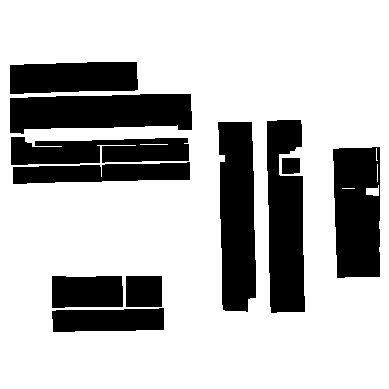

In [111]:
# load and visualize
import matplotlib.pyplot as plt

# Load the binary mask from the NumPy file
mask = np.load('binary_mask.npy')

print(mask.shape)
# Get the shape of the mask
height, width = mask.shape

# Set the extent based on the shape of the mask
extent = (0, width, 0, height)

# Plot the binary mask with exact extent
plt.imshow(mask, cmap='gray', extent=extent, interpolation='nearest')
plt.axis('off')

# Display the plot (optional)
plt.show()

In [114]:
# Crop and save the image and mask

# left, bottom, right, top in patch_bounds
patch_bounds
left, lower, right, top = patch_bounds
box = left, top, right, lower
print(patch_bounds)

with Image.open("/home/kandelaki/git/SAM-Adapter-PyTorch/preprocessing/test_folder/images/NW00603.tif") as img:
    img2 = img.crop(box)
    img2.save("NW00603_crop.png")

mask = np.load("binary_mask.npy")
img = Image.fromarray(mask)
img.save("binary_mask_crop.png")

(245.0, 1899.0, 757.0, 1387.0)


/home/kandelaki/miniconda3/envs/preprocessing/lib/python3.12/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (145431540 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


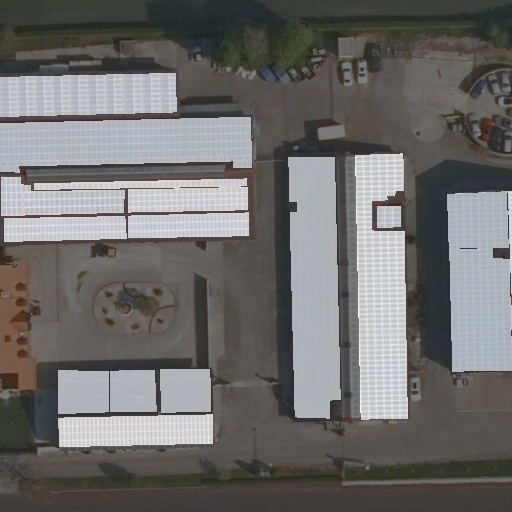

In [113]:
# overlay the mask on the image and visualize
from PIL import Image, ImageOps
img = Image.open("NW00603_crop.png")
mask = Image.open("binary_mask_crop.png")
mask = mask.convert("L")
mask = ImageOps.invert(mask)
mask.putalpha(128)
img.paste(mask, (0, 0), mask)
img.save("overlay.png")
img.show()